In [1]:
import h5py
import numpy as np

In [2]:
import json

In [3]:
# load the file
fname = "snap_000.hdf5"
snap = h5py.File(fname, 'r')

In [4]:
# Get particle IDs
partId = np.array(snap["PartType0"]["ParticleIDs"])
part_maj = np.where(partId <= 150184)[0]
part_min = np.where(partId > 150184)[0]

In [20]:
# Get coordinates
coords = snap["PartType0"]["Coordinates"] # kpc??
# calc radii
coords = np.array(coords)

In [6]:
rc_maj = [-200.6530761718750000, -49.5910644531250000, -0.7629394531250000]

In [7]:
rc_min = [rc_maj[0]+1162, rc_maj[1]+300, rc_maj[2]+0]

In [8]:
rc_maj

[-200.653076171875, -49.591064453125, -0.762939453125]

In [9]:
rc_min

[961.346923828125, 250.408935546875, -0.762939453125]

In [10]:
# rc=[-200.6530761718750000,-49.5910644531250000,-0.7629394531250000]
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
x[part_maj] -= rc_maj[0]
x[part_min] -= rc_min[0]
y[part_maj] -= rc_maj[1]
y[part_min] -= -rc_min[1]
z[part_maj] -= rc_maj[2]
z[part_min] -= rc_min[2]
radii = np.sqrt(x**2 + y**2 + z**2)

In [11]:
# Load fitted InternalEnergy
with open("s10_plt.json") as fp:
    data = json.load(fp)
r = np.arange(4999)
temperature = np.array(data["temperature_model"])
temp_mid = temperature[0,:]

In [12]:
# Replace batchly to avoid memory error, applying the nearest neighbor method
new_ie = np.zeros(radii.shape)
num_one_grp = 2000
num_grp = 200000 // num_one_grp
r_mat = np.repeat(r.reshape(1,4999),num_one_grp,0)
for i in range(num_grp):
    idx = np.arange(num_one_grp) + i*num_one_grp
    radii_mat = np.repeat(radii[idx].reshape(num_one_grp,1),4999,1)
    r_diff = np.abs(r_mat - radii_mat)
    r_min_idx = np.argmin(r_diff,axis=1)
    new_ie[idx] = temp_mid[r_min_idx] * 243236.2410815736

In [13]:
new_ie[part_min] *= 0.5

In [14]:
np.savetxt("InternalEnergy_man.txt",new_ie)

In [15]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

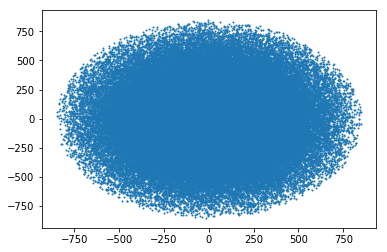

In [16]:
plt.scatter(coords[part_maj,0],coords[part_maj,1], s=1)

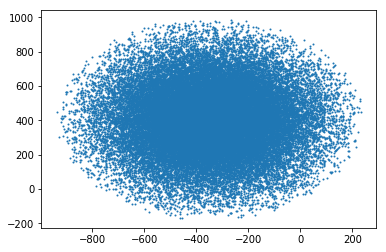

In [17]:
plt.scatter(coords[part_min,0],coords[part_min,1], s=1)